<a href="https://colab.research.google.com/github/ethankyle360/ML4SupplyChain/blob/main/section_11_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Assignment

### We will work on the sales of the UK retailer. Our aim is to analyze the seasonal and trend components for the monthly time series, then compare with seasonal ARIMA models and exponential smoothing model and agree for the best model for our time series.

1 - Convert retail clean to monthly time series of total sales per month.

2 - Make a plot for the trend, seasonality, and the remainder.

3 - Fit the time series to a moving average model, what is the AIC?

4 - Fit the time series to an AR model, what is the AIC?

5 - Fit the time series to an ARIMA model, what is the AIC?

6 - Do a search on the SARIMA components using intercools, what is the model with the lowest AIC?

7 - Make a plot with a forecast of 12 month ahead using the best fitted SARIMA.

8 - Make an exponential fitting using the combinations of the multiplicative and additive trend.

9 - Compare the best fitted exponential and the best fitted ARIMA in terms of RMSE and MAE.

10 - Which model you would go for at the end?

In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
retail_clean = pd.read_csv('retail_clean.csv')

In [4]:
retail_clean.info()
retail_clean.InvoiceDate
retail_clean['InvoiceDate'] = pd.to_datetime(retail_clean['InvoiceDate'])
retail_clean['date'] = retail_clean['InvoiceDate'].dt.strftime('%Y-%m-%d')
retail_clean['date'] = pd.to_datetime(retail_clean['date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739139 entries, 0 to 739138
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   739139 non-null  int64  
 1   Invoice      739139 non-null  int64  
 2   StockCode    739139 non-null  object 
 3   Description  739139 non-null  object 
 4   Quantity     739139 non-null  int64  
 5   InvoiceDate  739139 non-null  object 
 6   Price        739139 non-null  float64
 7   Customer ID  739139 non-null  float64
 8   Country      739139 non-null  object 
 9   Revenue      739138 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 56.4+ MB


In [6]:
retail_clean['month'] = retail_clean.date.dt.month
retail_clean['year'] = retail_clean.date.dt.year
retail_clean['week'] = retail_clean.date.dt.isocalendar().week

In [12]:
retail_clean.columns
retail_clean.month.describe()
time_series = retail_clean.groupby(['week', 'month', 'year']).agg(date = ('date', 'first'),
        total_sales = ('Quantity', np.sum)).reset_index().sort_values('date')

In [13]:
time_series = time_series.set_index('date')
monthly_series = time_series.total_sales.resample('M').sum()

<Axes: xlabel='date'>

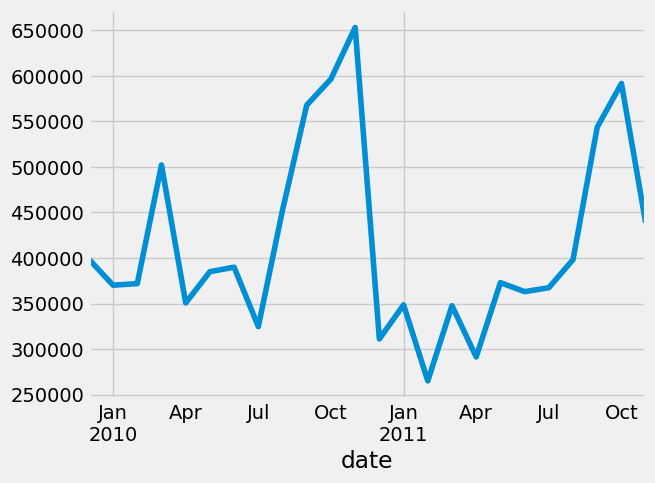

In [14]:
monthly_series.plot()